In [1]:
# coding: utf-8

## Try to read the .mat file

In [2]:
from scipy.io import loadmat
import glob
import pandas as pd
import numpy as np

In [3]:
train_file_path = '/home/ruifan/dataset/kaggle/train/train_1'

In [4]:
train_file_list = glob.glob(train_file_path + '/*.mat')

In [5]:
len(train_file_list)

1302

In [41]:
for file_path in train_file_list:
    print('try to load ' + file_path)
    mat = loadmat(file_path)
    break

try to load /home/ruifan/dataset/kaggle/train/train_1/1_1119_0.mat


In [7]:
for name in mat:
    print(name)

dataStruct
__version__
__header__
__globals__


In [8]:
type(mat['dataStruct'])

numpy.ndarray

In [9]:
mat['dataStruct'].dtype.names

('data', 'iEEGsamplingRate', 'nSamplesSegment', 'channelIndices', 'sequence')

In [16]:
mat['dataStruct']['data'][0, 0]

array([[  1.24388683, -43.84977722,  -4.35006523, ...,  13.23977089,
         -1.54598892,  11.27570534],
       [  5.24388695, -50.84977722,   0.64993471, ...,  12.23977089,
         -3.5459888 ,  14.27570534],
       [  1.24388683, -52.84977722,   1.64993465, ...,  14.23977089,
         -9.54598904,  16.27570534],
       ..., 
       [  7.24388695, -11.84977627, -34.35006714, ...,  12.23977089,
        -25.54598808,   6.27570534],
       [ 13.24388695,  -7.84977674, -45.35006714, ...,  11.23977089,
        -23.54598808,  10.27570534],
       [ 18.24388695, -13.84977627, -47.35006714, ...,   3.23977089,
        -24.54598808,  11.27570534]], dtype=float32)

In [40]:
mat['dataStruct']['data'][0, 0].shape

(240000, 16)

In [35]:
mat['dataStruct']['data'][0, 0][0]

array([  1.24388683, -43.84977722,  -4.35006523,  18.56971169,
        -6.27102757, -12.67306614,  14.65783215,  11.81856537,
        -9.64150524,   9.02091408,  10.81109333,  12.19291592,
       -23.92826843,  13.23977089,  -1.54598892,  11.27570534], dtype=float32)

In [21]:
mat['dataStruct']['iEEGsamplingRate'][0][0]

array([[ 400.]], dtype=float32)

In [29]:
mat['dataStruct']['nSamplesSegment'][0][0]

array([[ 240000.]], dtype=float32)

In [30]:
mat['dataStruct']['channelIndices'][0][0]

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.]], dtype=float32)

In [31]:
mat['dataStruct']['sequence'][0][0]

array([[ 3.]], dtype=float32)

## Try to convert numpy.ndarray to pandas.dataframe

In [51]:
data  = mat['dataStruct']['data'][0][0]
index = mat['dataStruct']['channelIndices'][0][0][0]
df = pd.DataFrame(mat['dataStruct']['data'][0][0], columns=index)

In [55]:
df.head(10)

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
0,1.243887,-43.849777,-4.350065,18.569712,-6.271028,-12.673066,14.657832,11.818565,-9.641505,9.020914,10.811093,12.192916,-23.928268,13.239771,-1.545989,11.275705
1,5.243887,-50.849777,0.649935,16.569712,3.728972,-13.673066,12.657832,12.818565,-11.641505,3.020914,10.811093,15.192916,-20.928268,12.239771,-3.545989,14.275705
2,1.243887,-52.849777,1.649935,17.569712,4.728972,-8.673066,10.657832,16.818565,-14.641505,-1.979086,8.811093,14.192916,-19.928268,14.239771,-9.545989,16.275705
3,2.243887,-49.849777,-1.350065,14.569713,8.728972,-0.673066,12.657832,17.818565,-16.641506,-10.979086,8.811093,16.192917,-15.928267,13.239771,-14.545989,20.275705
4,2.243887,-38.849777,-7.350065,5.569712,5.728972,-2.673066,13.657832,10.818565,-13.641505,-0.979086,5.811093,14.192916,-12.928267,13.239771,-14.545989,17.275705
5,3.243887,-28.849777,-8.350065,-2.430288,2.728972,-2.673066,18.657833,11.818565,-14.641505,4.020914,4.811093,12.192916,-10.928267,9.239771,-11.545989,16.275705
6,3.243887,-20.849777,-16.350065,-4.430288,4.728972,-7.673066,13.657832,5.818566,-11.641505,6.020914,6.811093,15.192916,-9.928267,8.239771,-12.545989,18.275705
7,7.243887,-15.849776,-19.350065,-5.430288,10.728972,-7.673066,5.657833,7.818566,-10.641505,2.020914,8.811093,12.192916,-4.928267,6.239771,-13.545989,13.275705
8,9.243887,-20.849777,-20.350065,-6.430288,20.728971,-8.673066,3.657832,4.818566,-5.641505,-0.979086,9.811093,10.192916,-1.928268,2.239771,-12.545989,11.275705
9,9.243887,-23.849777,-20.350065,-5.430288,29.728971,-7.673066,-1.342168,2.818566,-5.641505,-1.979086,7.811093,10.192916,2.071732,0.239771,-12.545989,12.275705


In [54]:
df.shape

(240000, 16)

## Save as a .csv file for further use

In [56]:
df.to_csv('/home/ruifan/dataset/kaggle/1.csv', index=False, header=True, encoding='utf-8')

## Try to plot some features

In [79]:
import matplotlib.pyplot as plt
import seaborn

In [58]:
%matplotlib inline

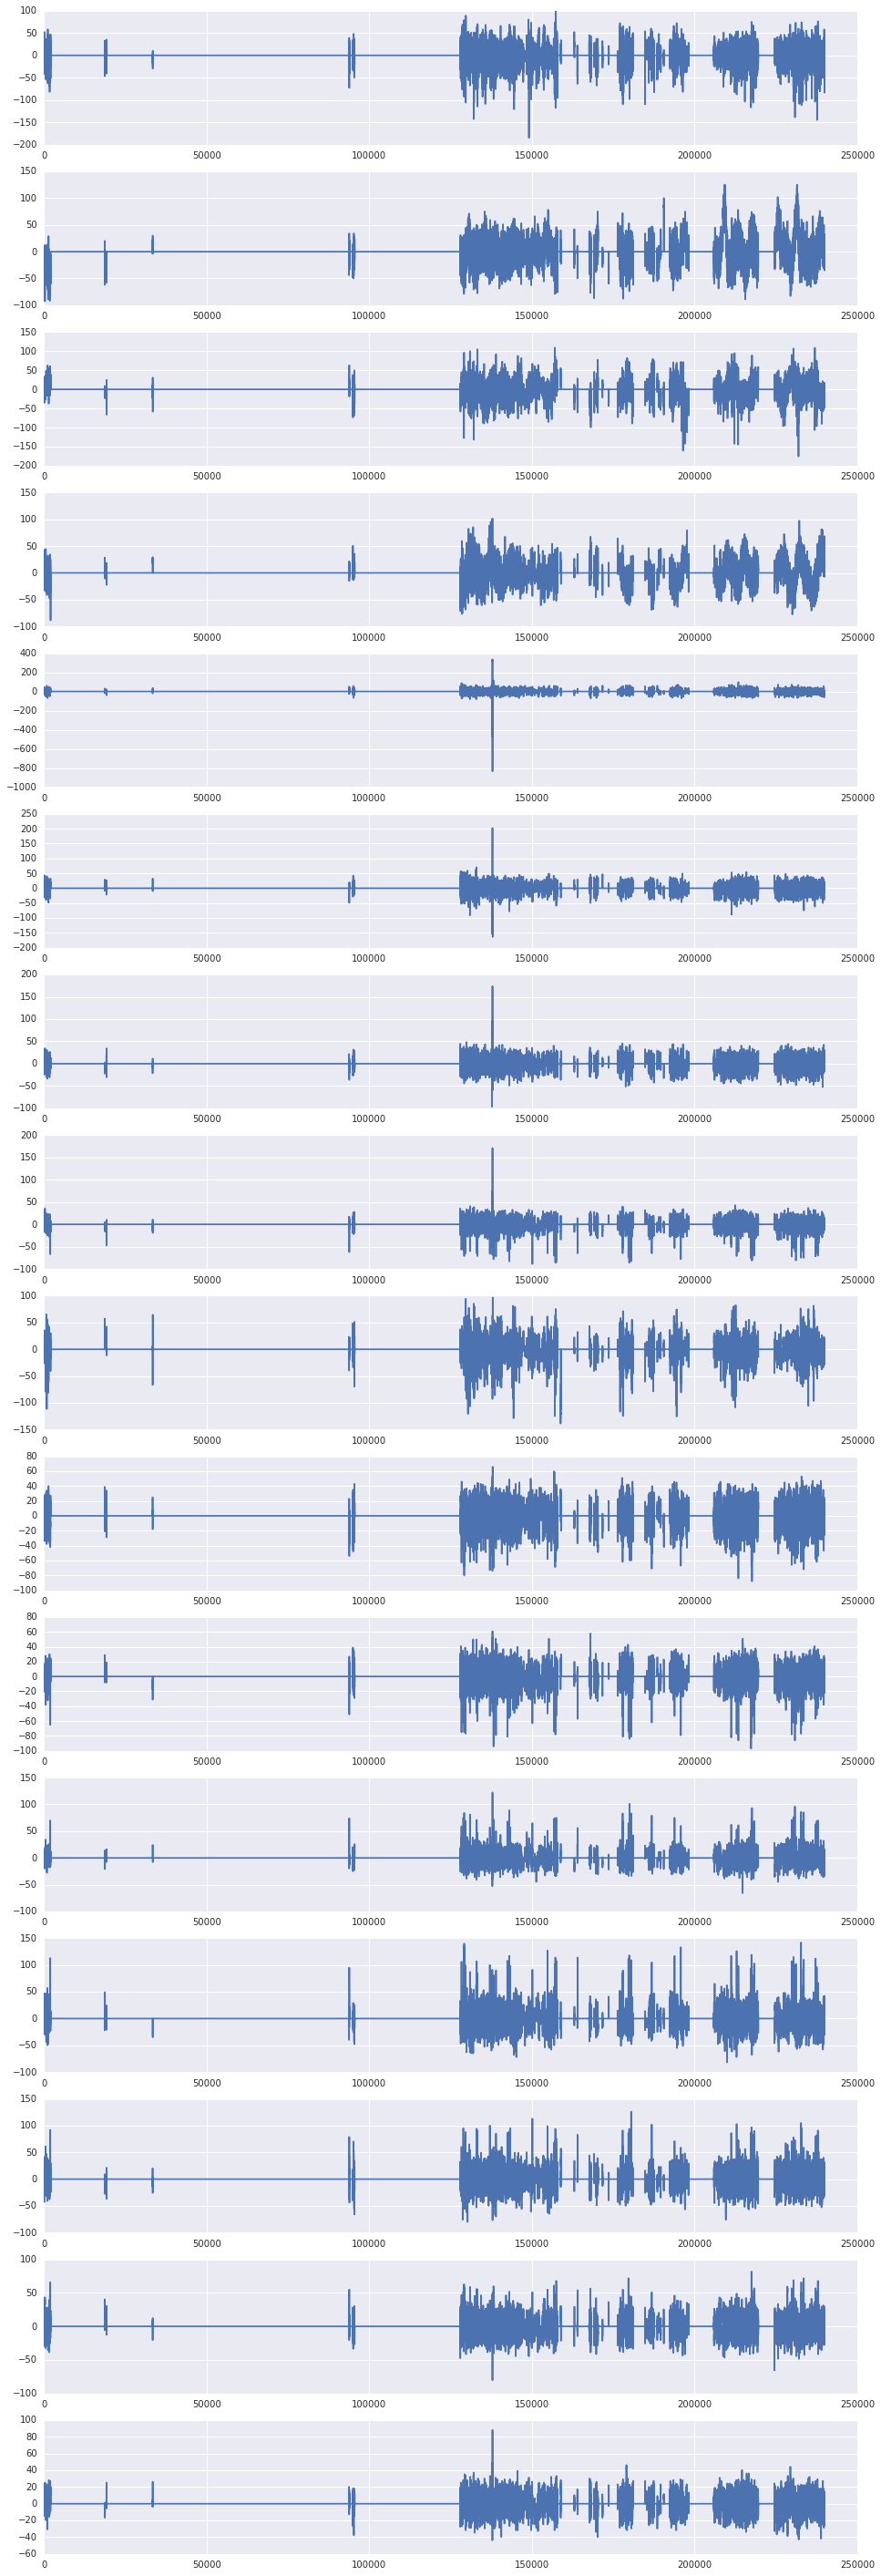

In [84]:
plt.figure(figsize=(16, 50)) 
for i in range(1, 17):
    plt.subplot(16, 1, i)
    plt.plot(df[i])